In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
df = pd.read_csv("D:\IGT\data\Bengaluru_House_Data.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df2 = df.drop(['area_type','availability','society','balcony'],axis = 1)

In [7]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df2.shape

(13320, 5)

In [10]:
df3 = df2.dropna()

In [11]:
df3.shape

(13246, 5)

In [12]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
df3['bhk'] = df3['size'].apply(lambda x :int(x.split(' ')[0]))

C:\Users\SAMIR\AppData\Local\Temp/ipykernel_4356/2318568990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x :int(x.split(' ')[0]))


In [15]:
df3.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


In [16]:
df4 = df3.drop(['size'],axis = 1)

In [17]:
df4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [18]:
df4[df4.bhk>15]

,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000,27.0,230.0,27
3379,1Hanuman Nagar,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,10000,16.0,550.0,16
4684,Munnekollal,2400,40.0,660.0,43
11559,1Kasavanhalli,1200,18.0,200.0,18


In [19]:
df4['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
def is_float(x):
    try:
        float(x)
    except:
        return True
    return False

In [21]:
df4[df4['total_sqft'].apply(is_float)].head(20)

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [22]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) ==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
    

In [23]:
convert_sqft_to_num('4125Perch')

In [24]:
df5 = df4.copy()

In [25]:
df5['total_sqft'] = df5['total_sqft'].apply(convert_sqft_to_num)

In [26]:
df5.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [27]:
df5[df5['total_sqft'].apply(is_float)].head(20)

,location,total_sqft,bath,price,bhk


In [28]:
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']

In [29]:
df5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [30]:
df5.shape

(13246, 6)

# Dimensionality Reduction


In [31]:
len(df5.location.unique())

1304

In [32]:
df5.location = df5.location.apply(lambda x:x.strip())

In [48]:
location_stats = df5.location.value_counts()

In [49]:
location_stats

Other                 2881
Whitefield             535
Sarjapur  Road         392
Electronic City        304
Kanakpura Road         266
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

In [33]:
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False )

In [34]:
df5.groupby('location').describe()

total_sqft          \
                                                     count    mean   
location                                                             
1 Annasandrapalya                                      1.0  1200.0   
1 Giri Nagar                                           1.0  5000.0   
1 Immadihalli                                          1.0  6000.0   
1 Ramamurthy Nagar                                     1.0  1200.0   
12th cross srinivas nagar banshankari 3rd stage        1.0  1800.0   
...                                                    ...     ...   
t.c palya                                              1.0  1350.0   
tc.palya                                               4.0  1075.0   
vinayakanagar                                          1.0  1200.0   
white field,kadugodi                                   1.0  2100.0   
whitefiled                                             1.0   935.0   

                                                                             \
                                                        std     min     25%   
location                                                                      
1 Annasandrapalya                                       NaN  1200.0  1200.0   
1 Giri Nagar                                            NaN  5000.0  5000.0   
1 Immadihalli                                           NaN  6000.0  6000.0   
1 Ramamurthy Nagar                                      NaN  1200.0  1200.0   
12th cross srinivas nagar banshankari 3rd stage         NaN  1800.0  1800.0   
...                                                     ...     ...     ...   
t.c palya                                               NaN  1350.0  1350.0   
tc.palya                                         225.314595   880.0   970.0   
vinayakanagar                                           NaN  1200.0  1200.0   
white field,kadugodi                                    NaN  2100.0  2100.0   
whitefiled                                              NaN   935.0   935.0   

                                                                         bath  \
                                                    50%     75%     max count   
location                                                                        
1 Annasandrapalya                                1200.0  1200.0  1200.0   1.0   
1 Giri Nagar                                     5000.0  5000.0  5000.0   1.0   
1 Immadihalli                                    6000.0  6000.0  6000.0   1.0   
1 Ramamurthy Nagar                               1200.0  1200.0  1200.0   1.0   
12th cross srinivas nagar banshankari 3rd stage  1800.0  1800.0  1800.0   1.0   
...                                                 ...     ...     ...   ...   
t.c palya                                        1350.0  1350.0  1350.0   1.0   
tc.palya                                         1010.0  1115.0  1400.0   4.0   
vinayakanagar                                    1200.0  1200.0  1200.0   1.0   
white field,kadugodi                             2100.0  2100.0  2100.0   1.0   
whitefiled                                        935.0   935.0   935.0   1.0   

                                                       ...    bhk        \
                                                 mean  ...    75%   max   
location                                               ...                
1 Annasandrapalya                                 6.0  ...  11.00  11.0   
1 Giri Nagar                                      9.0  ...  11.00  11.0   
1 Immadihalli                                    12.0  ...  11.00  11.0   
1 Ramamurthy Nagar                               11.0  ...  11.00  11.0   
12th cross srinivas nagar banshankari 3rd stage   1.0  ...   1.00   1.0   
...                                               ...  ...    ...   ...   
t.c palya                                         6.0  ...   6.00   6.0   
tc.palya                                          2.0  ...   2.25   3.0   


In [35]:
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [36]:
location_stats_less_than_10 = location_stats[location_stats<=10]

In [37]:
df5.location = df5.location.apply(lambda x: "Other" if x in location_stats_less_than_10 else x)

In [38]:
df5.head(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,Other,1020.0,6.0,370.00,6,36274.509804


In [39]:
df4.head(10)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
5,Whitefield,1170,2.0,38.00,2
6,Old Airport Road,2732,4.0,204.00,4
7,Rajaji Nagar,3300,4.0,600.00,4
8,Marathahalli,1310,3.0,63.25,3
9,Gandhi Bazar,1020,6.0,370.00,6


# Removing Outliers


In [40]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
9,Other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,Other,500.0,3.0,100.0,3,20000.000000


In [41]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]

In [42]:
df6.shape

(12502, 6)

In [43]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [44]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for keys,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        s = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-s)) & (subdf.price_per_sqft<=(m+s))]
        df_out = pd.concat([df_out,reduced_df],ignore_index= True)
    return df_out
        
        

In [45]:
df7 = remove_pps_outliers(df6)

In [46]:
df6.shape

(12502, 6)

In [47]:
df7.shape

(10241, 6)

Text(0, 0.5, 'Count')

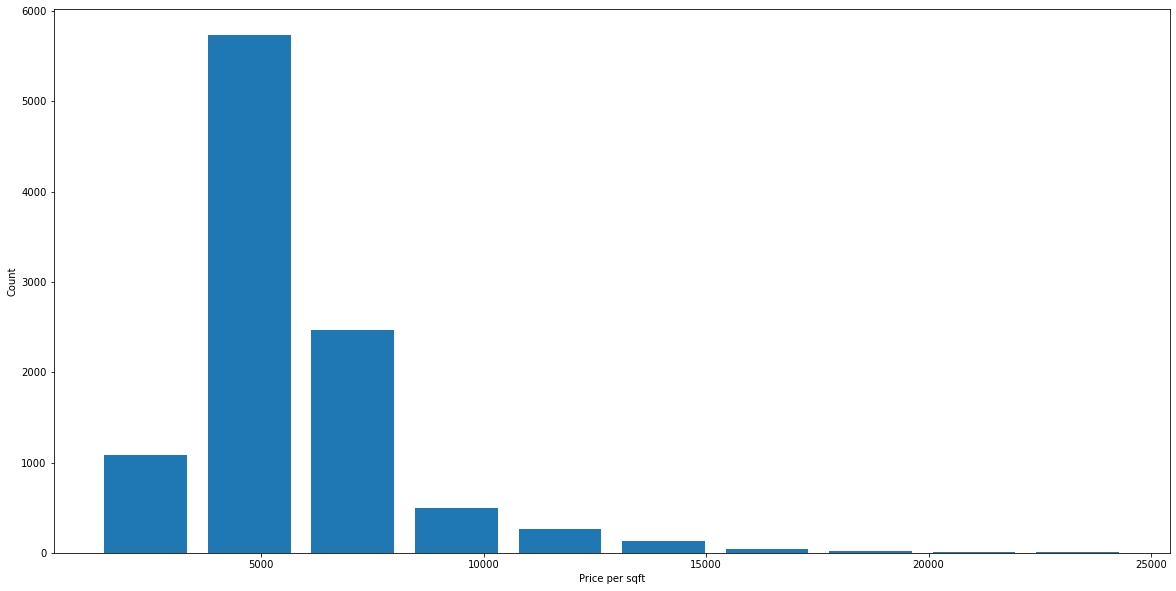

In [52]:
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(df7.price_per_sqft,rwidth = 0.8)
plt.xlabel("Price per sqft")
plt.ylabel("Count")


In [54]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [55]:
df7[df7.bath>10]

,location,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
5925,Other,12000.0,12.0,525.0,10,4375.000000
6014,Other,10000.0,16.0,550.0,16,5500.000000
6747,Other,6000.0,12.0,150.0,11,2500.000000
7078,Other,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

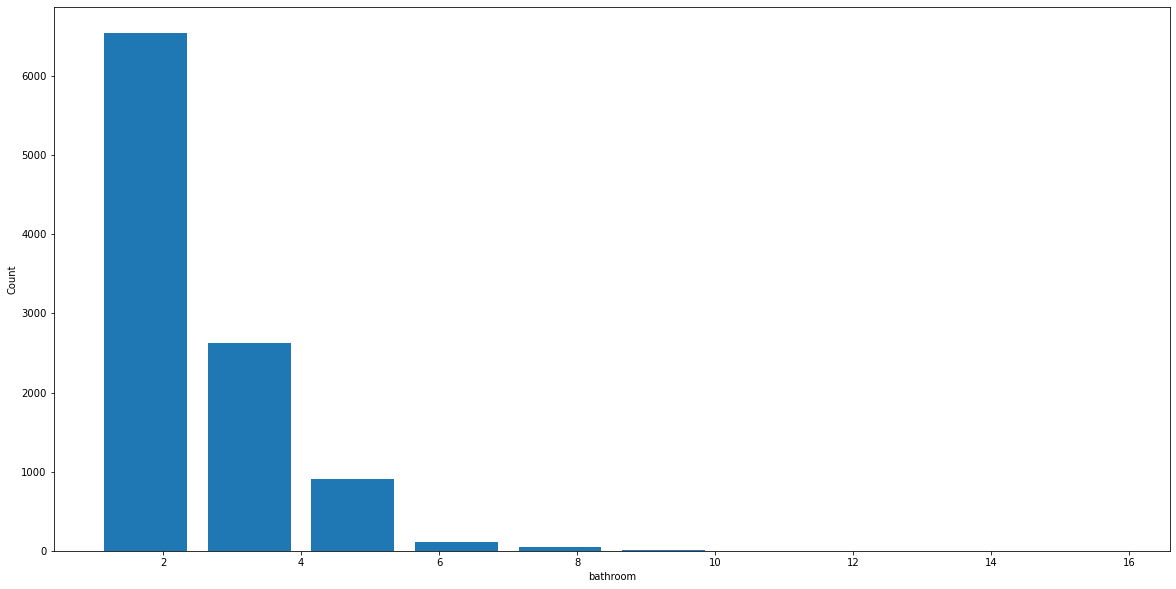

In [56]:
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(df7.bath,rwidth = 0.8)
plt.xlabel("bathroom")
plt.ylabel("Count")


In [57]:
df7[df7.bhk>df7.bath+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
3561,JP Nagar,2700.0,4.0,160.0,7,5925.925926
4415,Kengeri,3000.0,5.0,130.0,8,4333.333333
6391,Other,1800.0,3.0,105.0,6,5833.333333
6565,Other,3150.0,5.0,145.0,8,4603.174603
6692,Other,3000.0,4.0,130.0,8,4333.333333
6796,Other,1850.0,3.0,175.0,6,9459.459459


In [67]:
df8 = df7[~(df7.bhk>df7.bath+2)]

In [68]:
# df8 = df7[df7.bhk<=df7.bath+2]

In [69]:
df8.shape

(10235, 6)

In [73]:
df10 = df8.drop(['price_per_sqft'],axis = 1)

In [74]:
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [76]:
dummies = pd.get_dummies(df10.location)

In [77]:
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
df11 = pd.concat([df10,dummies.drop(['Yeshwanthpur'],axis = 1)],axis = 1)

In [80]:
df11.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
df12 = df11.drop('location',axis = 1)

In [82]:
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
X = df12.drop('price',axis = 1)

In [84]:
y = df12.price

In [85]:
from sklearn.model_selection import train_test_split


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [95]:
len(X_train)

6857

In [96]:
len(X_test)

3378

In [102]:
from sklearn.linear_model import LinearRegression


In [103]:
model = LinearRegression()

In [104]:
model.fit(X_train,y_train)

LinearRegression()

In [105]:
model.score(X_test,y_test)

0.7781530849780207

In [106]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [107]:
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=25)

In [108]:
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.79499559, 0.76296966, 0.84788034, 0.81258274, 0.81492943])

In [109]:
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
def predict_score(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2]= bhk
    if loc_index>=0:
        x[loc_index]=1
    return model.predict([x])[0]

In [116]:
predict_score('1st Block Jayanagar',1630,3,3)

247.01677147395475

In [117]:
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [123]:
import pickle


In [124]:
with open('banglore_home_price_mode.pickle','wb') as f:
    pickle.dump(model,f)

In [125]:
import json


In [126]:
columns = {
    'data_column':[col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))